In [1]:
#import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings("ignore")

In [2]:
#set ticker as variable
gold = yf.Ticker("GC=F")

In [3]:
gold_df = gold.history(period="1d", start="2000-01-01", end="2022-10-01").drop(columns=["Dividends","Stock Splits"])
gold_df.columns = ["open","high","low","close","volumne"]
gold_df.index.names =["timestamp"]
gold_df = pd.concat([gold_df], axis=1, keys=["XAU"])

<AxesSubplot:title={'center':'Gold Value'}, xlabel='Time', ylabel='Price'>

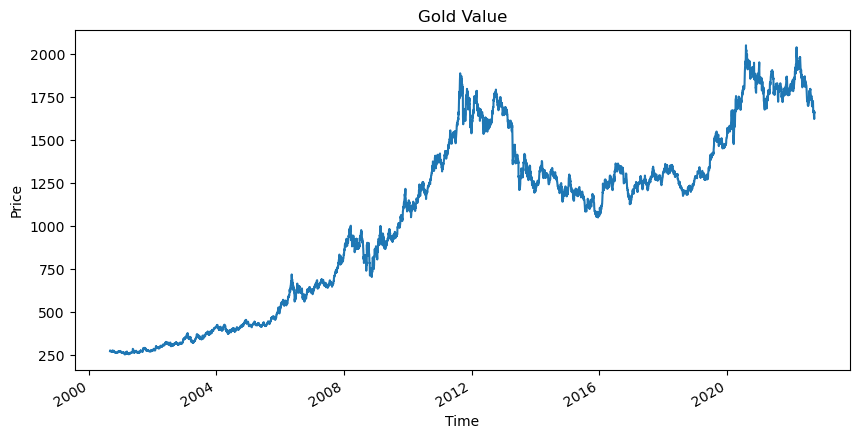

In [4]:
#plot the dataframe as line chart
gold_df["XAU"]["close"].plot(title = "Gold Value", xlabel = "Time", ylabel = "Price", figsize = (10,5))

In [5]:
#run Monte Carlo Simulation
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_XAU = MCSimulation(
    portfolio_data = gold_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [6]:
# Run Monte Carlo simulations to forecast five years daily returns
MC_XAU.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995440,0.994186,1.009019,0.981611,1.000610,1.009942,0.993484,1.008865,0.998947,0.994418,...,1.011262,1.023986,1.016607,1.009547,0.998374,1.001217,1.015442,1.002812,1.006463,0.992177
2,1.004862,0.986160,1.021082,0.976800,0.997781,1.000102,0.991918,1.028317,1.001740,0.969482,...,1.018946,1.038067,1.030495,0.994876,0.995649,0.981283,1.019179,0.994209,1.021079,0.993577
3,1.013760,0.995432,1.009555,0.972364,0.990493,1.014737,0.981282,1.040660,1.020438,0.978888,...,1.016791,1.025215,1.032777,1.001647,1.004502,0.985112,1.011509,0.989927,1.029201,1.018150
4,1.015520,0.986294,1.017676,0.964399,0.970661,1.017775,0.975889,1.048186,1.031831,0.982124,...,1.000383,1.028504,1.022196,1.012406,1.012219,0.987179,1.043276,0.995070,1.027899,1.022738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.493475,1.422267,1.417949,0.951696,1.504832,3.630754,1.812273,1.458129,1.464899,2.321252,...,3.294301,1.193177,1.600616,1.496722,3.599843,2.353044,1.267556,2.149159,1.014332,2.774711
1257,2.495899,1.419055,1.446169,0.952798,1.532114,3.581320,1.810287,1.442654,1.467461,2.270097,...,3.272847,1.189070,1.578767,1.481519,3.570146,2.329283,1.290609,2.144722,1.019194,2.748771
1258,2.473162,1.403211,1.439051,0.960624,1.548239,3.554420,1.811417,1.449806,1.462802,2.269094,...,3.320468,1.191928,1.583683,1.470188,3.634335,2.332200,1.289944,2.128059,0.994390,2.757232
1259,2.502526,1.430265,1.429493,0.959411,1.569272,3.550447,1.857156,1.474251,1.470079,2.319851,...,3.314157,1.194208,1.568845,1.462714,3.588987,2.360782,1.293974,2.124729,0.990910,2.765633


In [7]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_XAU.simulated_return.mean(axis=1)),
    "median": list(MC_XAU.simulated_return.median(axis=1)),
    "min": list(MC_XAU.simulated_return.min(axis=1)),
    "max": list(MC_XAU.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,0.999886,1.000347,0.963897,1.029975
2,1.000087,1.000429,0.952642,1.045936
3,1.000327,1.000656,0.939597,1.071777
4,1.000733,1.000593,0.936765,1.075369


In [8]:
# Set initial investment
initial_investment = 350000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,350000.000000,350000.000000,350000.000000,350000.000000
1,349960.150961,350121.561300,337364.046718,360491.226218
2,350030.316605,350150.278516,333424.558186,366077.465794
3,350114.555121,350229.481805,328858.858818,375121.865538
4,350256.441608,350207.429593,327867.765194,376379.134825


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of XAU Value Over the Next Year'}>

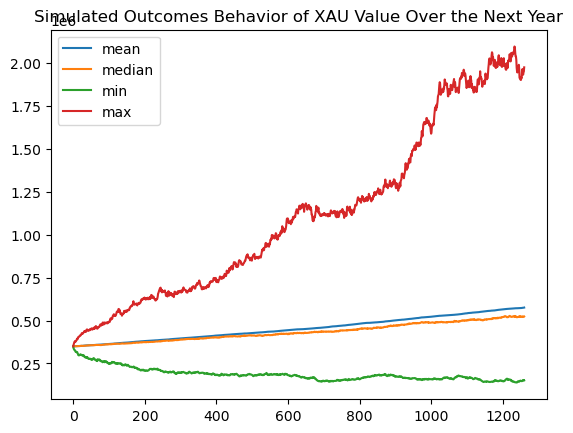

In [9]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of XAU Value Over the Next Year")

In [10]:
#display summary statistics for simulations
MC_XAU_sim_sum_stats = MC_XAU.summarize_cumulative_return()
display(MC_XAU_sim_sum_stats)

count           1000.000000
mean               1.644362
std                0.695496
min                0.432732
25%                1.138446
50%                1.495325
75%                2.006156
max                5.639645
95% CI Lower       0.696918
95% CI Upper       3.287851
Name: 1260, dtype: float64

In [11]:
#find minimum return and store variable
MC_XAU_lower_thirty_cumu_return = MC_XAU_sim_sum_stats[8] * 350000
%store MC_XAU_lower_thirty_cumu_return
display(MC_XAU_lower_thirty_cumu_return)

Stored 'MC_XAU_lower_thirty_cumu_return' (float64)


243921.35718766222

In [12]:
#find maximum return and store variable
MC_XAU_upper_thirty_cumu_return = MC_XAU_sim_sum_stats[9] * 350000
%store MC_XAU_upper_thirty_cumu_return
display(MC_XAU_upper_thirty_cumu_return)

Stored 'MC_XAU_upper_thirty_cumu_return' (float64)


1150747.9212363614